In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import string

In [2]:

df = pd.read_csv('train.csv')

In [3]:
df=df.drop(['id'],axis=1)

In [4]:
df.isnull().sum()


label    0
tweet    0
dtype: int64

In [5]:
df['label'].value_counts()


label
0    29720
1     2242
Name: count, dtype: int64

## Visualization

<Axes: xlabel='label', ylabel='count'>

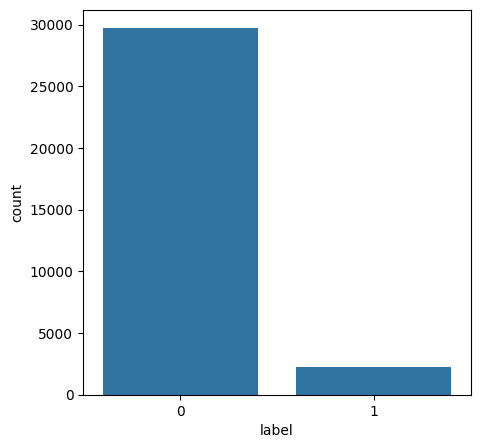

In [6]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

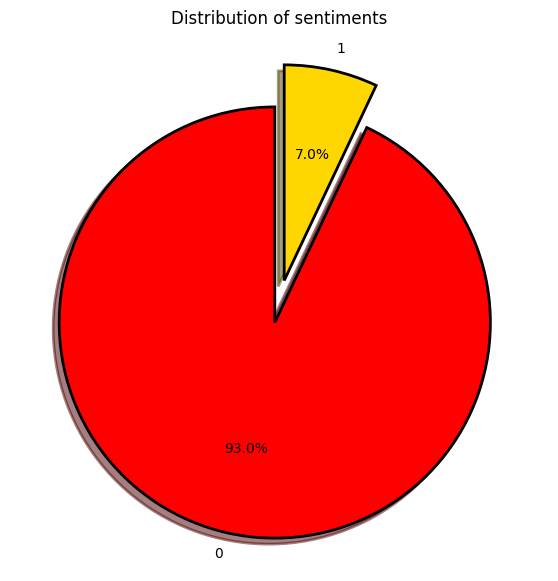

In [7]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [8]:
non_hate_tweets = df[df.label == 0]
non_hate_tweets.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


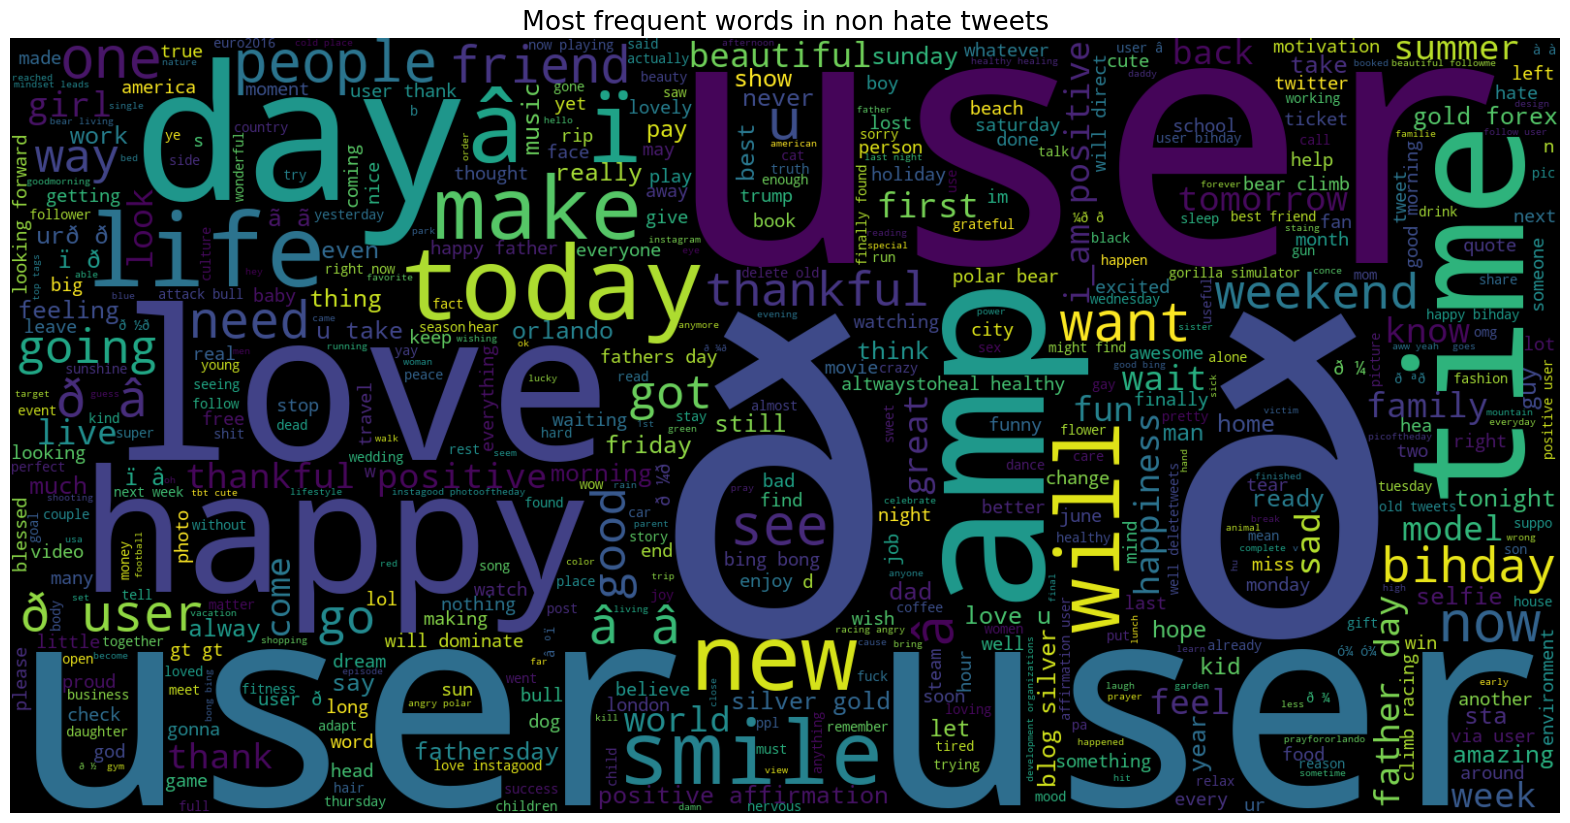

In [9]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [10]:
neg_tweets = df[df.label == 1]
neg_tweets.head()

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...


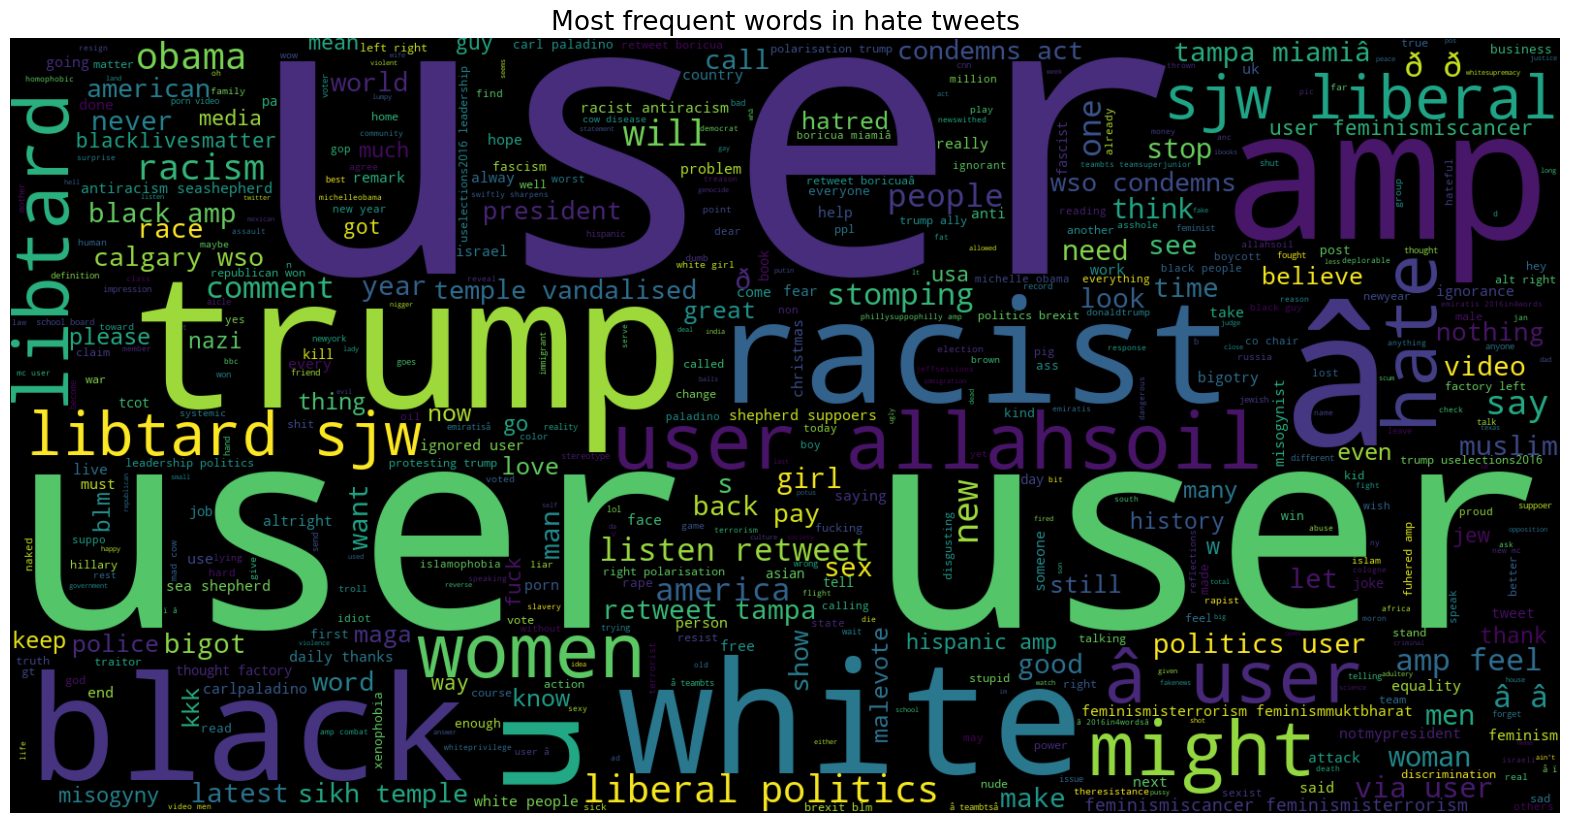

In [11]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [12]:
df


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


## text preprocessing

In [13]:
import string

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [14]:
df["tweet"] = df["tweet"].apply(wordopt)


In [15]:
df = df.drop_duplicates('tweet')


In [ ]:
df.to_csv("test_clean.csv",index=False)

## feature extractor

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=10000)  # Set max_features to a manageable number
X = vect.fit_transform(df.tweet)
y = df['label']


In [20]:
y.value_counts()

label
0    27474
1     1999
Name: count, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (23578, 10000)
Size of y_train: (23578,)
Size of x_test:  (5895, 10000)
Size of y_test:  (5895,)


## training

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(x_train)
test_prediction= rfc.predict(x_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

#  prediction Summary by species
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9558948261238338
train accuracy: 0.9997031130715074
********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5503
           1       0.86      0.40      0.55       392

    accuracy                           0.96      5895
   macro avg       0.91      0.70      0.76      5895
weighted avg       0.95      0.96      0.95      5895

********************
95.59% Accurate


In [24]:
# modeling

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
print('*'*20)
# prediction
#x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)


test_prediction = LR.predict(x_test)
train_prediction = LR.predict(x_train)

#evaluation

print('*'*20)
from sklearn.metrics import accuracy_score, confusion_matrix

print('train_accuracy',accuracy_score(y_train,train_prediction))

print('test_accuracy',accuracy_score(y_test,test_prediction))


print('*'*20)

print(confusion_matrix(y_test,test_prediction))
print(classification_report(test_prediction,y_test))

print('*'*20)
# Accuracy score
LR_SC = accuracy_score(test_prediction,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

********************
********************
train_accuracy 0.9495292221562474
test_accuracy 0.9441899915182358
********************
[[5494    9]
 [ 320   72]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5814
           1       0.18      0.89      0.30        81

    accuracy                           0.94      5895
   macro avg       0.59      0.92      0.64      5895
weighted avg       0.99      0.94      0.96      5895

********************
94.42% Accurate


In [26]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
print('*'*20)

# prediction
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score

accuracy_score(y_test,test_pred)
print('test accuracy:',accuracy_score(y_test,test_pred))

print('*'*20)

# classification report

print(classification_report(test_pred,y_test))

print('*'*20)
nb_a = accuracy_score(y_test,test_pred)
print(f"{round(nb_a*100,2)}% Accurate")

********************
********************
test accuracy: 0.944698897370653
********************
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5825
           1       0.17      0.97      0.29        70

    accuracy                           0.94      5895
   macro avg       0.59      0.96      0.63      5895
weighted avg       0.99      0.94      0.96      5895

********************
94.47% Accurate


In [27]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

# prediction
train_prediction= XGB.predict(x_train)
test_prediction= XGB.predict(x_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# classification report

print(classification_report(y_test,test_prediction))

print('*'*20)

XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.9502968617472435
train accuracy: 0.9646704555093731
********************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5503
           1       0.82      0.32      0.46       392

    accuracy                           0.95      5895
   macro avg       0.89      0.66      0.72      5895
weighted avg       0.95      0.95      0.94      5895

********************
95.03% Accurate


In [28]:
# decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(x_train)
test_pred= DT.predict(x_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 0.9998303503265756
Test accuracy: 0.9358778625954198
********************
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5503
           1       0.52      0.49      0.50       392

    accuracy                           0.94      5895
   macro avg       0.74      0.73      0.73      5895
weighted avg       0.93      0.94      0.94      5895

********************
93.59% Accurate
********************


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=42)
gb.fit(x_train,y_train)
print('*'*20)

# prediction
train_prediction= gb.predict(x_train)
test_prediction= gb.predict(x_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gb_SC = accuracy_score(test_prediction,y_test)
print(f"{round(gb_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.944698897370653
train accuracy: 0.94982610908474
********************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5503
           1       0.85      0.20      0.33       392

    accuracy                           0.94      5895
   macro avg       0.90      0.60      0.65      5895
weighted avg       0.94      0.94      0.93      5895

********************
94.47% Accurate


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Assume df is your DataFrame with columns 'tweet' and 'Label'
# Preprocess the data
max_words = 10000
max_len = 256
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet'])

sequences = tokenizer.texts_to_sequences(df['tweet'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Convert labels to numpy array
labels = np.array(df['label'])

# One-hot encode the labels
labels = to_categorical(labels)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(labels.shape[1], activation='softmax'))  # Adjust the number of units to match the number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate on the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=-1), y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(np.argmax(y_test, axis=-1), y_pred))


Epoch 1/5
516/516 [==============================] - 92s 173ms/step - loss: 0.2883 - accuracy: 0.9217 - val_loss: 0.2220 - val_accuracy: 0.9380
Epoch 2/5
516/516 [==============================] - 98s 190ms/step - loss: 0.1913 - accuracy: 0.9309 - val_loss: 0.1537 - val_accuracy: 0.9452
Epoch 3/5
516/516 [==============================] - 84s 163ms/step - loss: 0.1189 - accuracy: 0.9524 - val_loss: 0.1311 - val_accuracy: 0.9595
Epoch 4/5
516/516 [==============================] - 86s 166ms/step - loss: 0.0840 - accuracy: 0.9708 - val_loss: 0.1293 - val_accuracy: 0.9620
Epoch 5/5
277/277 [==============================] - 12s 42ms/step
Accuracy: 0.9534042071929427
Precision: 0.948844462140826
Recall: 0.9534042071929427
F1 Score: 0.9501006925346709

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8248
           1       0.71      0.52      0.60       594

    accuracy                           0.95      8842
 

In [33]:
score = [nb_a, gb_SC, RF_SC, XGB_HSC, DT_SC,LR_SC,accuracy]
Models = pd.DataFrame({
    'Model':["Naive Bayes", "Gradient Boost", "Random Forest", "XGBoost", "Decision Tree", "Logistic Regression","Bilstm"]
,
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.955895
6,Bilstm,0.953404
3,XGBoost,0.950297
0,Naive Bayes,0.944699
1,Gradient Boost,0.944699
5,Logistic Regression,0.944190
4,Decision Tree,0.935878


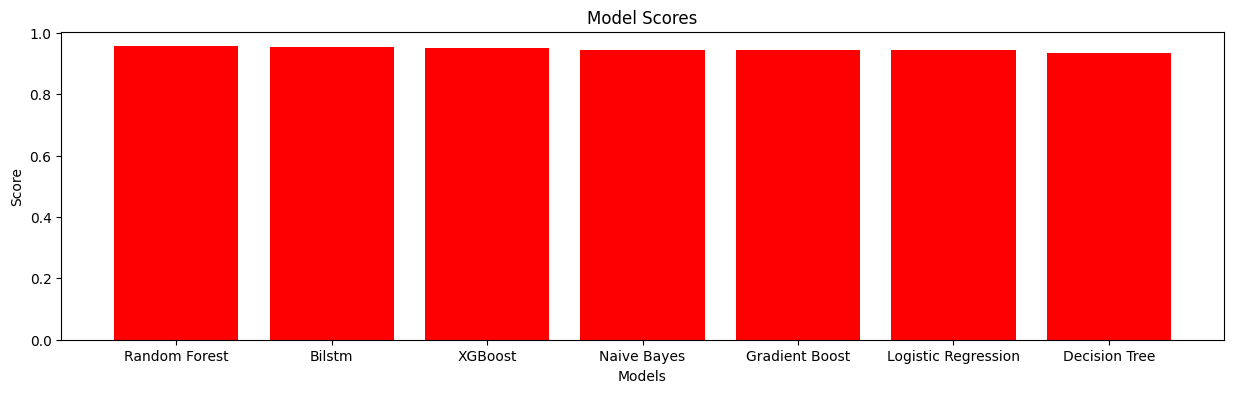

In [36]:
import matplotlib.pyplot as plt
# Your score values
score = [nb_a, gb_SC, RF_SC, XGB_HSC, DT_SC,LR_SC,accuracy]
# Your model names
models =["Naive Bayes", "Gradient Boost", "Random Forest", "XGBoost", "Decision Tree", "Logistic Regression","Bilstm"]
# Create a DataFrame
models_df = pd.DataFrame({'Model': models, 'Score': score})
# Sort the DataFrame by the 'Score' column in descending order
models_df = models_df.sort_values(by='Score', ascending=False)
# Plot the bar graph
plt.figure(figsize=(15, 4))
plt.bar(models_df['Model'], models_df['Score'], color='red')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Scores')
plt.show()

In [41]:
# df.to_csv('clean_tweets.csv',index=False)

In [37]:
import pickle
filename = 'vectorizer.pkl'
pickle.dump(vect, open(filename, 'wb'))

In [38]:
import pickle
filename = 'tweet.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [39]:
print('Test 1')
test1 = ["used mama earth newly launched onion oil twice must say im already impressed result prevents hair loss help control premature greying dryness dandruff scalp eruption many hair problem regular use avoid dry frizzy hair make sure use oil hair twice week oiling provides scalp essential nutrient also strengthens hair root mamaearth onion oil work best hair season"]
test_vec = vect.transform(test1)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 1
The Predicted Rating is : [0]


In [54]:
import re
from nltk.stem import WordNetLemmatizer
import pickle

# Load vectorizer and model
vectorizer = pickle.load(open('vectorizer.pkl','rb'))
mnb = pickle.load(open('tweet.pkl','rb'))

strr = "follow up from the gentlemen who were kicked off of  user airlines for simply speaking arabic "
print("-------------------------------")
example_counts = vectorizer.transform([strr])
prediction = mnb.predict(example_counts)
print(prediction)


-------------------------------
[0]


In [56]:
import re
from nltk.stem import WordNetLemmatizer
import pickle

# Load vectorizer and model
vectorizer = pickle.load(open('vectorizer.pkl','rb'))
mnb = pickle.load(open('tweet.pkl','rb'))

strr = input('Enter Your Message: ')
print("-------------------------------")
example_counts = vectorizer.transform([strr])
prediction = mnb.predict(example_counts)
print(prediction)


-------------------------------
[1]
